In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error

In [2]:
#load dataset to pandas datafram
df = pd.read_csv("datasets/Loan Prediction/dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping missing values because I can't replace them in a logical way
df = df.dropna()

In [8]:
#No missing values anymore
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#Chceking the data once again
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [10]:
# label encoding to change string categories into numbers we can use
# We can use ----> df.replace({"Loan_Status":{"N":0, "Y":1}}, inplace=True)
# We can also use ----> df.replace(to_replace={'N':0, 'Y':1}, inplace=True)
# But an easier, more profound way is to use LabelEncoder ( I think )

le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


In [13]:
# Dependent column values
# Notice the 3+, we have to change that
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# Replacing the "3+" with int 4 
df.replace({'Dependents':{"3+":4}}, inplace=True)

In [15]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## Data Visualization


<AxesSubplot:xlabel='Education', ylabel='count'>

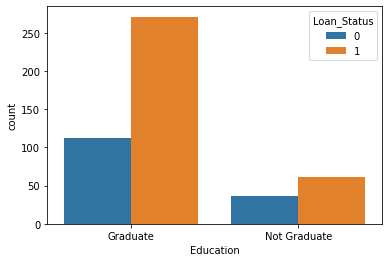

In [16]:
# Trying to understand the relationship between Education + Loan Status
# There are more graduated people who apply for loans + You have a higher chance to get a loan if you're graduated
sns.countplot(x='Education', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

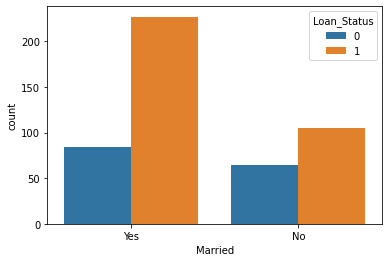

In [17]:
# Same thing but for Marital status + Loan Status
# There are more married people who apply for loans + married people happen to have a higher chance of loan approval

sns.countplot(x='Married', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

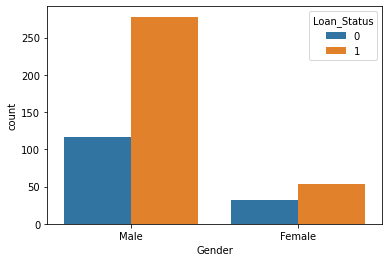

In [18]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

In [19]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())

Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64


In [20]:
#Another way to do it df = df.replace(to_replace={'Yes':1, 'No':0, 'Male':1, 'Female':0, 'Graduate':1, 'Not Graduate':0, 'Rural':0, 'Semiurban':1, 'Urban':2})
#Transforming all of the categorecal columns 
columns_to_transform = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for column in columns_to_transform:
    df[column] = le.fit_transform(df[column])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
print(df['Property_Area'].value_counts())

1    191
2    150
0    139
Name: Property_Area, dtype: int64


In [23]:
# Separating the data
X = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = df['Loan_Status']
print(X)
print("=============================================================")
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [25]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
475       1        1          2          0              1            16525   
456       1        1          0          0              0             4301   
342       1        1          1          1              0             4554   
440       1        0          0          0              0             3660   
250       1        1          0          1              0             1668   
..      ...      ...        ...        ...            ...              ...   
559       0        1          0          0              0             4180   
578       1        1          1          0              0             1782   
205       0        0          0          1              0             4408   
610       1        1          4          0              0             4106   
28        1        0          0          1              0             1442   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

array([[<AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Property_Area', ylabel='CoapplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Coapplican

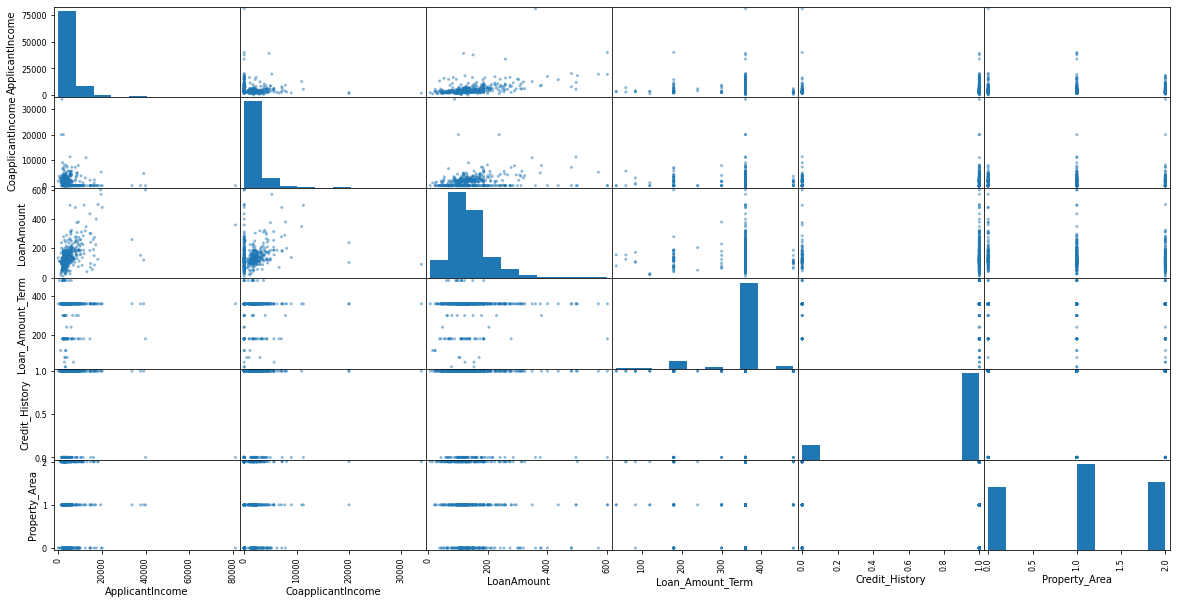

In [43]:
#correlation measurement by pandas
from pandas.plotting import scatter_matrix
attributes = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",
"Loan_Amount_Term", "Credit_History", "Property_Area"]
scatter_matrix(df[attributes], figsize=(20, 10))

In [27]:
df.to_csv("New Loan Prediction.csv")

In [29]:
#model = SGDRegressor(learning_rate='constant', eta0=0.0000000000001, max_iter=1000, random_state=42)
svm.SVC(kernel='linear')
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print(X_test.shape)
print(y_pred)

(96, 11)
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1]


In [52]:
#Model evaluation
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score( y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [53]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error: 0.19791666666666666
R-squared: 0.07878787878787874
Accuracy: 0.80
Precision: 0.81
Recall: 0.92
F1-score: 0.87
Mean Absolute Error (MAE): 0.20


In [54]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of X_test: (96, 11)
Shape of y_test: (96,)
Shape of y_pred: (96,)


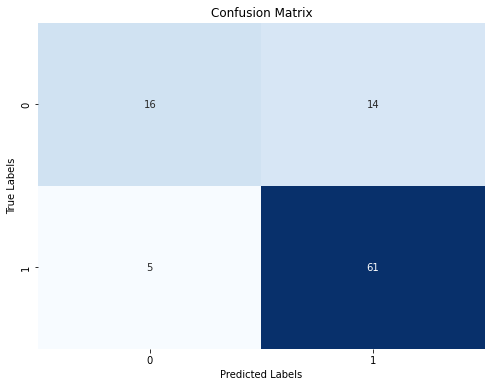

In [40]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()